In [6]:
# Author: Romain Tavenard
# License: BSD 3 clause

import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt

from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler, TimeSeriesScalerMinMax
from tslearn.piecewise import PiecewiseAggregateApproximation, SymbolicAggregateApproximation, OneD_SymbolicAggregateApproximation

import src.packages.db.db_connect as db
import src.packages.utils.dataset as ds

%matplotlib notebook

register_matplotlib_converters()

figsize=(9.8, 5)

In [7]:
# Dataset
dataset_raw, ts, te = ds.get_dataset_from_db(start_min=54, start_sec=40, interval_sec=25)
dataset_y = dataset_raw['y_axis'].values
timestamp = dataset_raw['timestampdata']
series = pd.Series(dataset_y, index=timestamp)

# Absolute
series = series.abs()

# Resample
dataset = series.resample('L').std()


In [8]:
# # Rescale time series
# size = 2000

# scaler1 = TimeSeriesScalerMeanVariance(mu=0., std=1.)  
# scaler2 = TimeSeriesResampler(sz=size)
# scaler3 = TimeSeriesScalerMinMax(min=-2., max=2.)

# # MeanVariance
# # dataset = scaler1.fit_transform(dataset)

# # Resampler
# dataset = scaler2.fit_transform(dataset)

# # MinMax
# dataset = scaler3.fit_transform(dataset)

# # Rows count
# rows = np.count_nonzero(dataset)


In [9]:
# PAA transform (and inverse transform) of the data
n_paa_segments = 2000
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
paa_dataset_inv = paa.inverse_transform(paa.fit_transform(dataset))

# SAX transform
n_sax_symbols = 20
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
sax_dataset_inv = sax.inverse_transform(sax.fit_transform(dataset))

# 1d-SAX transform
n_sax_symbols_avg = 8
n_sax_symbols_slope = 8
one_d_sax = OneD_SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols_avg,
                                                alphabet_size_slope=n_sax_symbols_slope)
one_d_sax_dataset_inv = one_d_sax.inverse_transform(one_d_sax.fit_transform(dataset))



25000


<IPython.core.display.Javascript object>


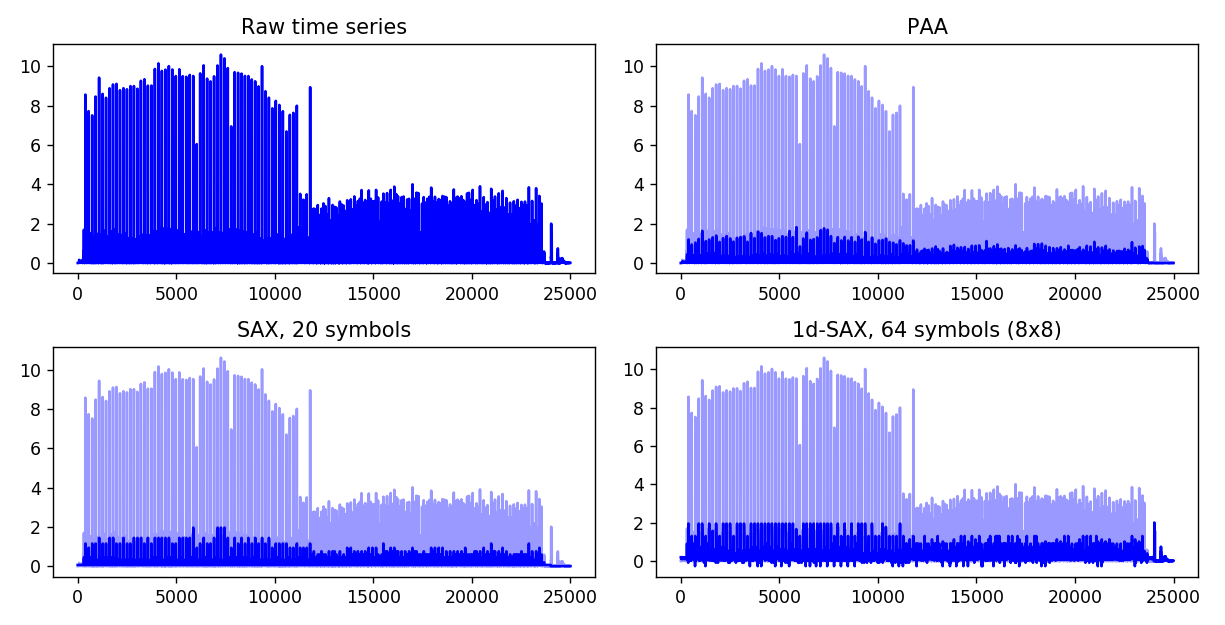

In [13]:
print('')
print(dataset.size)

plt.figure(figsize=figsize)
plt.subplot(2, 2, 1)  # First, raw time series
plt.plot(dataset.ravel(), "b-")
plt.title("Raw time series")

plt.subplot(2, 2, 2)  # Second, PAA
plt.plot(dataset.ravel(), "b-", alpha=0.4)
plt.plot(paa_dataset_inv[0].ravel(), "b-")
plt.title("PAA")

plt.subplot(2, 2, 3)  # Then SAX
plt.plot(dataset.ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv[0].ravel(), "b-")
plt.title("SAX, %d symbols" % n_sax_symbols)

plt.subplot(2, 2, 4)  # Finally, 1d-SAX
plt.plot(dataset.ravel(), "b-", alpha=0.4)
plt.plot(one_d_sax_dataset_inv[0].ravel(), "b-")
plt.title("1d-SAX, %d symbols (%dx%d)" % (n_sax_symbols_avg * n_sax_symbols_slope,
                                          n_sax_symbols_avg,
                                          n_sax_symbols_slope))

plt.tight_layout()


plt.show()


In [14]:
sax